In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data08 = pd.read_csv('Resources/Forbes Global 2000 - 2008.csv')
data09 = pd.read_csv('Resources/Forbes Global 2000 - 2009.csv')
data10 = pd.read_csv('Resources/Forbes Global 2000 - 2010.csv')
data11 = pd.read_csv('Resources/Forbes Global 2000 - 2011.csv')
data12 = pd.read_csv('Resources/Forbes Global 2000 - 2012.csv')
data13 = pd.read_csv('Resources/Forbes Global 2000 - 2013.csv')
data14 = pd.read_csv('Resources/Forbes Global 2000 - 2014.csv')
data15 = pd.read_csv('Resources/Forbes Global 2000 - 2015.csv')
data16 = pd.read_csv('Resources/Forbes Global 2000 - 2016.csv')
data17 = pd.read_csv('Resources/Forbes Global 2000 - 2017.csv')
data18 = pd.read_csv('Resources/Forbes Global 2000 - 2018.csv', error_bad_lines=False)
data19 = pd.read_csv('Resources/Forbes Global 2000 - 2019.csv')
data20 = pd.read_csv('Resources/Forbes Global 2000 - 2020.csv')
data21 = pd.read_csv('Resources/Forbes Global 2000 - 2021.csv')

In [3]:
# Removing $ from the values
data20["Sales"] = data20["Sales"].str.replace('$','')
data20["Profits"] = data20["Profits"].str.replace('$','')
data20["Assets"] = data20["Assets"].str.replace('$','')
data20["Market Value"] = data20["Market Value"].str.replace('$','')

In [4]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data20['Sales']= data20['Sales'].replace(value,regex=True).map(pd.eval)
data20['Sales'] = round(data20['Sales'],2) # necessary?
data20['Profits']= data20['Profits'].replace(value,regex=True).map(pd.eval)
data20['Profits'] = round(data20['Profits'],2) # necessary?
data20['Assets']= data20['Assets'].replace(value,regex=True).map(pd.eval)
data20['Assets'] = round(data20['Assets'],2) # necessary?
data20['Market Value']= data20['Market Value'].replace(value,regex=True).map(pd.eval)
data20['Market Value'] = round(data20['Market Value'],2) # necessary?

In [5]:
# Removing $ from the values
data21["Sales"] = data21["Sales"].str.replace('$','')
data21["Profit"] = data21["Profit"].str.replace('$','')
data21["Assets"] = data21["Assets"].str.replace('$','')
data21["Market Value"] = data21["Market Value"].str.replace('$','')

In [6]:
# Replaced one NaN value with 0 to allow for formatting
data21 = data21.fillna(0)

In [7]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data21['Sales']= data21['Sales'].replace(value,regex=True).map(pd.eval)
data21['Sales'] = round(data21['Sales'],2) # necessary?
data21['Profit']= data21['Profit'].replace(value,regex=True).map(pd.eval)
data21['Profit'] = round(data21['Profit'],2) # necessary?
data21['Assets']= data21['Assets'].replace(value,regex=True).map(pd.eval)
data21['Assets'] = round(data21['Assets'],2) # necessary?
data21['Market Value']= data21['Market Value'].replace(value,regex=True).map(pd.eval)
data21['Market Value'] = round(data21['Market Value'],2) # necessary?

In [8]:
# Changing 0 back to NaN value in case needed
data21.replace(0,np.nan, inplace=True)

In [9]:
# Should column names for the currencies reflect billions? 

In [10]:
# rename the columns for concat
data08.columns = ['Company', 'Industry', 'Country', 'Market Value',
       'Profits', 'Assets', 'Sales', 'Rank', 'Year']
data09.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year']
data10.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data11.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data15.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data16.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data17.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data18.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data19.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data20.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry', 'Year']
data21.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value',
       'Year']

In [11]:
#combine the dataset together 
frames = [data08, data09, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21]

result = pd.concat(frames)

In [12]:
# Displaying new df
result

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Sector,Continent
0,HSBC Holdings,Banking,United Kingdom,180.81,19.13,2348.98,146.50,1.0,2008,NaN,NaN
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,NaN,NaN
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,NaN,NaN
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,NaN,NaN
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,JTEKT,NaN,Japan,3.50,-0.03,25.00,13.10,1996.0,2021,NaN,NaN
1996,Insurance Australia Group,NaN,Australia,9.30,-0.21,7.10,5.40,1997.0,2021,NaN,NaN
1997,Sumec Corporation,NaN,China,1.30,0.08,7.50,13.00,1997.0,2021,NaN,NaN
1998,Gold Fields,NaN,South Africa,8.90,0.72,2.60,3.90,1999.0,2021,NaN,NaN


In [13]:
#result.to_csv("aroissues-forbes-global-2000-2008-2019/combined.csv")

In [14]:
# find US data
us = result.loc[result["Country"] == "United States"]

In [15]:
# Removing columns
us.drop(columns=['Sector','Continent'], inplace=True)

In [16]:
# Identifying unique companies
companies = us["Company"].unique()

In [17]:
# Grouping by years for companies
years = us.groupby("Year")["Company"].unique()

In [18]:
# Identifying the unique industries
industries = us["Industry"].unique()

In [19]:
industries # maybe select a few industries to reduce data for analysis

array(['Conglomerates', 'Banking', 'Oil & Gas Operations',
       'Diversified Financials', 'Telecommunications Services',
       'Retailing', 'Insurance', 'Household & Personal Products',
       'Software & Services', 'Technology Hardware & Equip',
       'Drugs & Biotechnology', 'Media', 'Food Drink & Tobacco',
       'Semiconductors', 'Aerospace & Defense',
       'Health Care Equipment & Svcs', 'Capital Goods', 'Chemicals',
       'Utilities', 'Materials', 'Hotels, Restaurants & Leisure',
       'Transportation', 'Consumer Durables', 'Food Markets',
       'Business Services & Supplies', 'Construction',
       'Food, Drink & Tobacco', 'Major Banks', 'Investment Services',
       'Telecommunications services', 'Discount Stores',
       'Diversified Insurance', 'Computer Services',
       'Household-Personal Care', 'Pharmaceuticals', 'Computer Hardware',
       'Software & Programming', 'Auto & Truck Manufacturers',
       'Medical Equipment & Supplies', 'Beverages',
       'Communic

In [20]:
# Testing a sample on banking industry
financials = us.loc[(us["Industry"] == "Banking") | (us["Industry"] == "Major Banks") | (us["Industry"] == "Regional Banks")
              | (us["Industry"] == "Diversified Financials") | (us["Industry"] == "Investment Services")
              | (us["Industry"] == "Consumer Financial Services")]
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
22,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008
23,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008
...,...,...,...,...,...,...,...,...,...
1775,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020
1807,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020
1860,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020
1958,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020


In [21]:
# Resetting index
financials.reset_index(inplace=True, drop=True)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008
...,...,...,...,...,...,...,...,...,...
863,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020
864,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020
865,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020
866,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020


In [22]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       868 non-null    object 
 1   Industry      868 non-null    object 
 2   Country       868 non-null    object 
 3   Market Value  868 non-null    float64
 4   Profits       867 non-null    float64
 5   Assets        868 non-null    float64
 6   Sales         867 non-null    float64
 7   Rank          868 non-null    float64
 8   Year          868 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 61.2+ KB


In [23]:
# Finding the profit max from all years
financials_highest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmax()]
financials_highest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
1,JPMorgan Chase,Banking,United States,136.880,15.370,1562.150,116.350,4.0,2008
101,Berkshire Hathaway,Diversified Financials,United States,122.110,4.990,267.400,107.790,19.0,2009
186,Goldman Sachs Group,Diversified Financials,United States,84.950,13.390,849.000,51.670,25.0,2010
262,JPMorgan Chase,Major Banks,United States,182.200,17.400,2117.600,115.500,1.0,2011
322,JPMorgan Chase,Major Banks,United States,170.100,19.000,2265.800,110.800,2.0,2012
377,JPMorgan Chase,Major Banks,United States,191.400,21.300,2359.100,108.200,3.0,2013
445,Fannie Mae,Investment Services,United States,4.600,84.000,3270.100,122.900,355.0,2014
482,Wells Fargo,Major Banks,United States,278.273,23.057,1701.408,90.403,10.0,2015
536,Berkshire Hathaway,Investment Services,United States,360.145,24.083,561.068,210.821,4.0,2016
599,JPMorgan Chase,Major Banks,United States,306.616,24.231,2512.986,102.494,4.0,2017


In [24]:
# Finding the profit min from all years
financials_lowest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmin()]
financials_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
20,Merrill Lynch,Diversified Financials,United States,48.020,-7.7800,1020.050,62.680,431.0,2008
125,Fannie Mae,Diversified Financials,United States,0.460,-58.3000,912.400,43.120,824.0,2009
217,Fannie Mae,Diversified Financials,United States,1.100,-71.9700,869.140,29.070,849.0,2010
292,Fannie Mae,Investment Services,United States,0.464,-14.0000,3222.000,154.300,790.0,2011
351,Fannie Mae,Investment Services,United States,1.800,-16.9000,3211.500,137.700,795.0,2012
414,CIT Group,Consumer Financial Services,United States,9.000,-0.6000,44.000,4.000,1265.0,2013
477,Interactive Brokers Group,Investment Services,United States,1.200,0.0000,37.900,1.100,1806.0,2014
528,Interactive Brokers Group,Investment Services,United States,1.986,0.0445,43.385,1.100,1751.0,2015
588,INTL FCStone,Regional Banks,United States,0.539,0.0539,5.217,24.469,1630.0,2016
647,CIT Group,Consumer Financial Services,United States,8.799,-0.8609,64.170,4.351,1272.0,2017


In [25]:
financials['Company'].unique()

array(['Bank of America', 'JPMorgan Chase', 'Berkshire Hathaway',
       'Goldman Sachs Group', 'Citigroup', 'Wells Fargo', 'Wachovia',
       'Morgan Stanley', 'Lehman Bros Holdings', 'American Express',
       'US Bancorp', 'Bank of New York Mellon', 'Capital One Financial',
       'SunTrust Banks', 'State Street', 'PNC Financial Services', 'BB&T',
       'Regions Financial', 'Principal Financial', 'Charles Schwab',
       'Merrill Lynch', 'Fifth Third Bancorp', 'Ameriprise Financial',
       'Fannie Mae', 'KeyCorp', 'Freddie Mac', 'Northern Trust',
       'BlackRock', 'Washington Mutual', 'ProLogis', 'Franklin Resources',
       'National City', 'M&T Bank', 'Simon Property Group',
       'NYSE Euronext', 'SLM', 'CME Group', 'Comerica', 'Vornado Realty',
       'Marshall & Ilsley', 'Host Hotels & Resorts', 'MasterCard',
       'Countrywide Financial', 'TD Ameritrade Holding',
       'Equity Residential', 'Legg Mason', 'Annaly Capital Mgmt',
       'Western Union', 'Boston Properties'

In [26]:
std_financials = financials.groupby('Company').aggregate({'Profits':["mean",
                                "median", "var", "std", "sem"]})
std_financials

Profits                                      
                               mean  median       var       std       sem
Company                                                                  
AGNC Investment           -0.032250  0.3760  1.884257  1.372682  0.686341
AMB Property               0.310000  0.3100       NaN       NaN       NaN
Affiliated Managers Group  0.513080  0.4713  0.015108  0.122915  0.054969
Ally Financial             1.073750  1.0335  0.017709  0.133075  0.066537
AmeriCredit                0.230000  0.2300       NaN       NaN       NaN
...                             ...     ...       ...       ...       ...
Western Alliance Bancorp.  0.448000  0.4480  0.000288  0.016971  0.012000
Western Union              0.947980  0.9099  0.020772  0.144125  0.064454
Wintrust Financial         0.340000  0.3400  0.000200  0.014142  0.010000
Zions Bancorp              0.235285  0.4000  0.300089  0.547804  0.151933
iStar Financial            0.240000  0.2400       NaN       NaN       NaN

[154 rows x 5 columns]

In [27]:
financials['Profits'].mean()

2.2654229527104963

In [28]:
profit_bins = [-100, 0, 5, 10, 100] # need to sort out size for profit amounts
labels = ["Profit Loss/No Profit", "Less than $5 bil", "Between $5-10 bil", "Above $10 bil"]
financials["Profit Range"] = pd.cut(financials['Profits'], profit_bins, labels=labels)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,Above $10 bil
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
863,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020,Profit Loss/No Profit
864,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020,Less than $5 bil
865,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020,Less than $5 bil
866,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020,Less than $5 bil


In [29]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

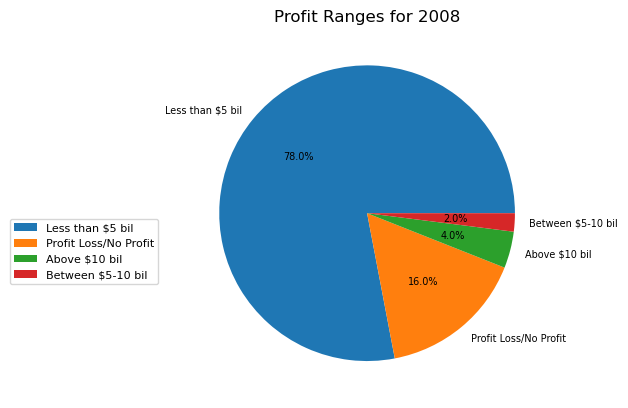

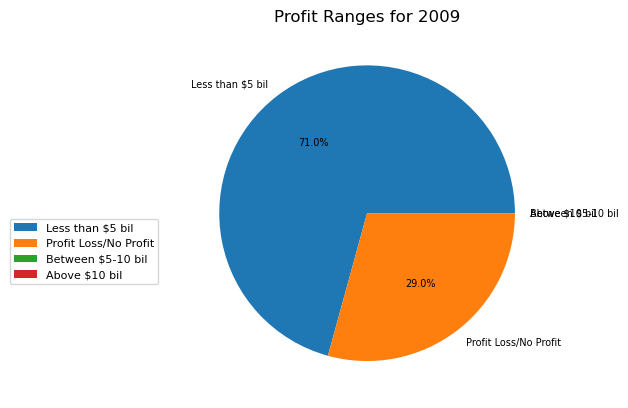

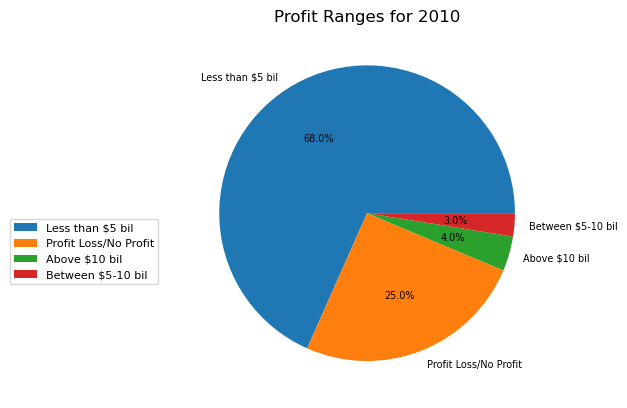

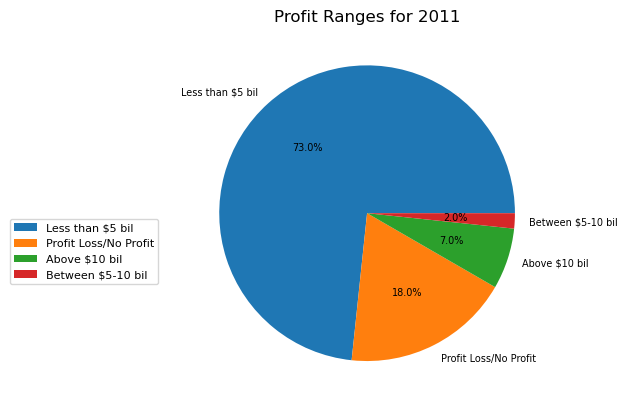

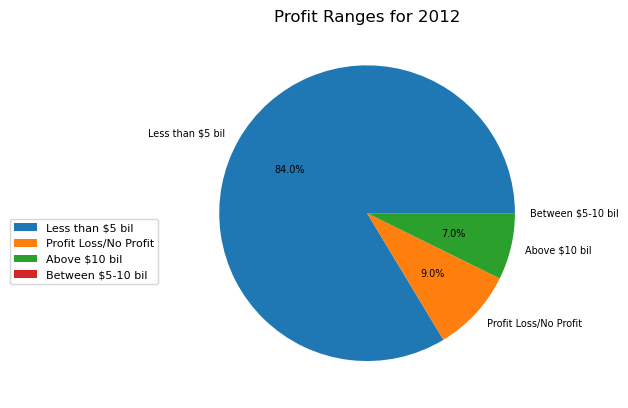

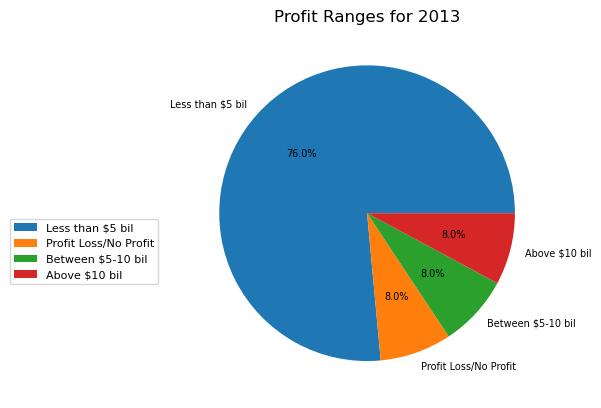

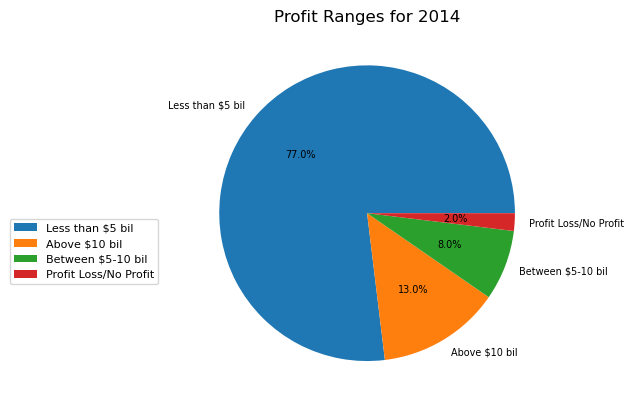

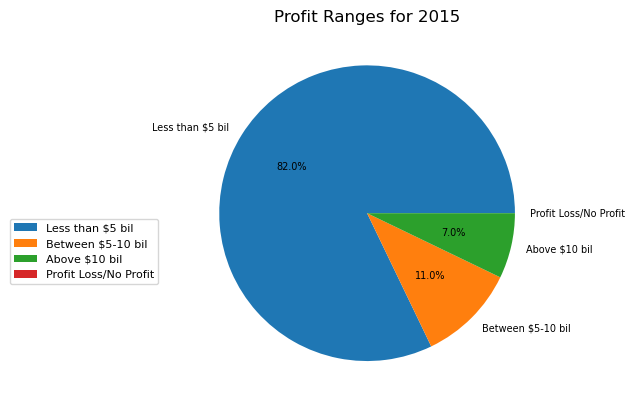

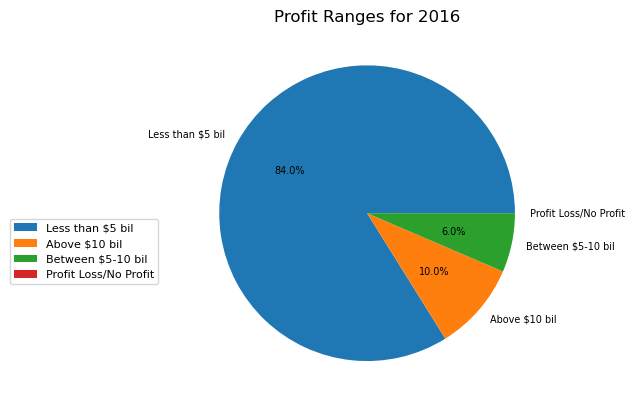

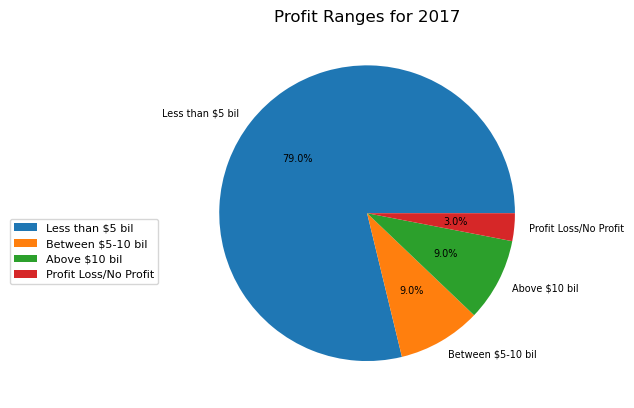

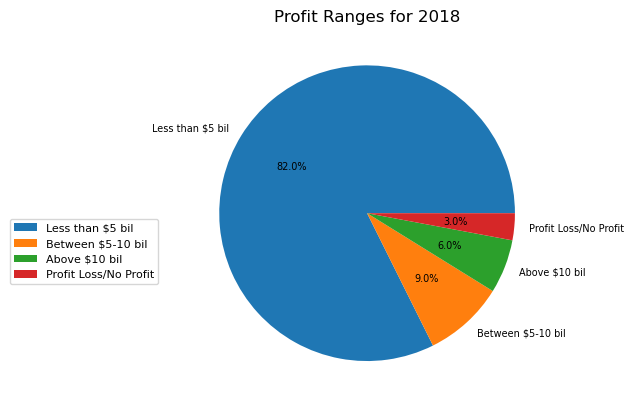

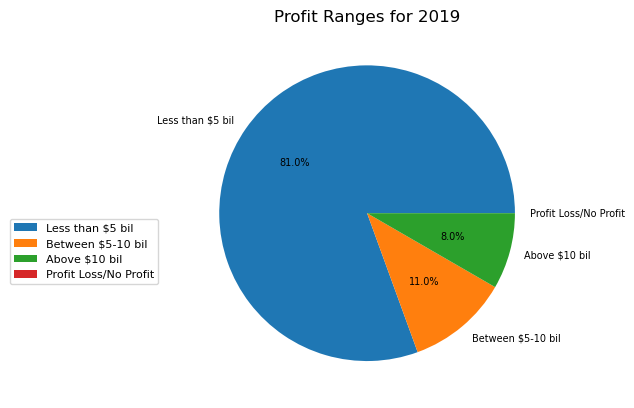

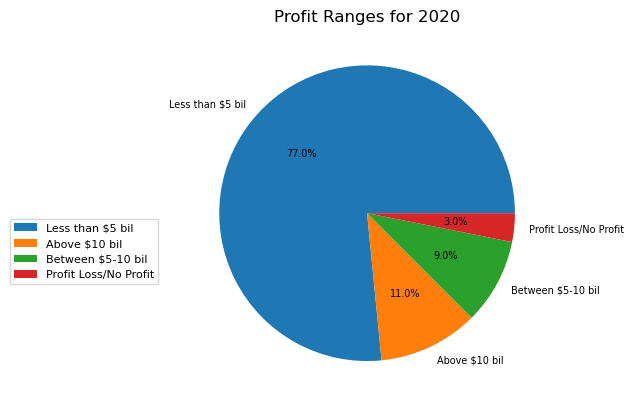

In [30]:
for year in years:
    profit_year = financials[financials['Year'] == year]
    ranges = profit_year['Profit Range'].value_counts()
    plt.pie(ranges.values,labels=ranges.index.values,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',radius=1,textprops={'fontsize': 7})
    plt.title(f"Profit Ranges for {year}", pad=5)
    plt.legend(bbox_to_anchor=(-0.05, .5), fontsize=8)
    plt.show()